## 2. SALES PREDICTION USING PYTHON

In [74]:
import pandas as pd
df=pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding="ISO-8859-1")
print(df.shape)
df.head()

(500, 9)


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [75]:
print(df.isnull().sum())
print(df.dtypes)
df.describe()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64
customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [76]:
print(df['gender'].unique())
df.nunique()

[0 1]


customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

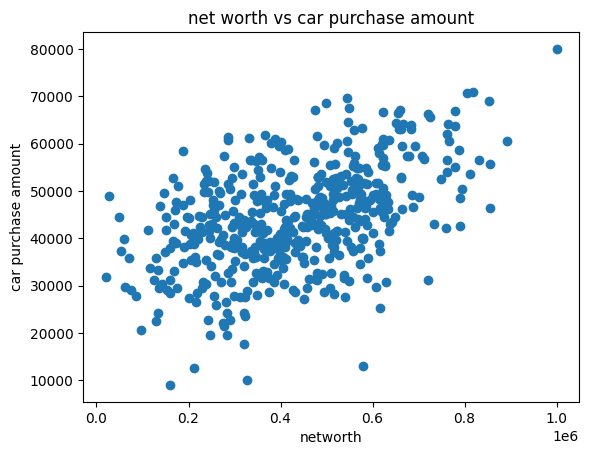

In [77]:
# net worth vs car purchase
plt.scatter(y='car purchase amount',x='net worth',data=df)
plt.xlabel('networth')
plt.ylabel('car purchase amount')
plt.title('net worth vs car purchase amount');

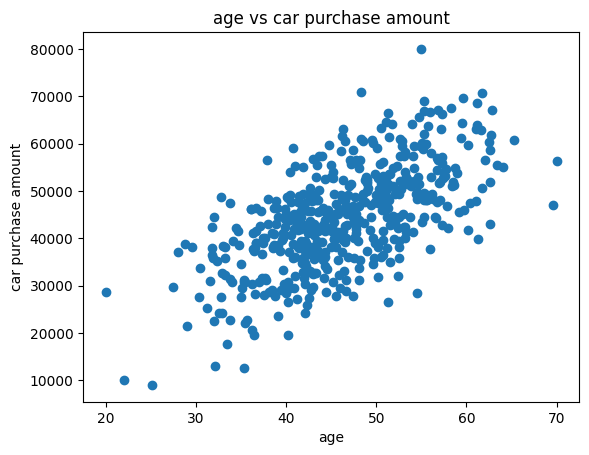

In [78]:
# age vs car purchase
plt.scatter(y='car purchase amount',x='age',data=df)
plt.xlabel('age')
plt.ylabel('car purchase amount')
plt.title('age vs car purchase amount');

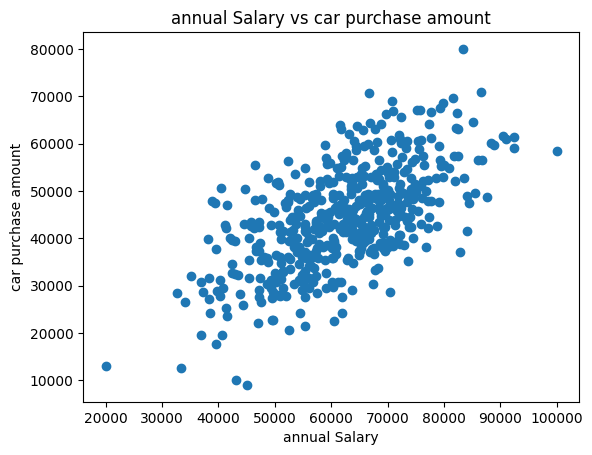

In [79]:
# annual Salary vs car purchase
plt.scatter(y='car purchase amount',x='annual Salary',data=df)
plt.xlabel('annual Salary')
plt.ylabel('car purchase amount')
plt.title('annual Salary vs car purchase amount');

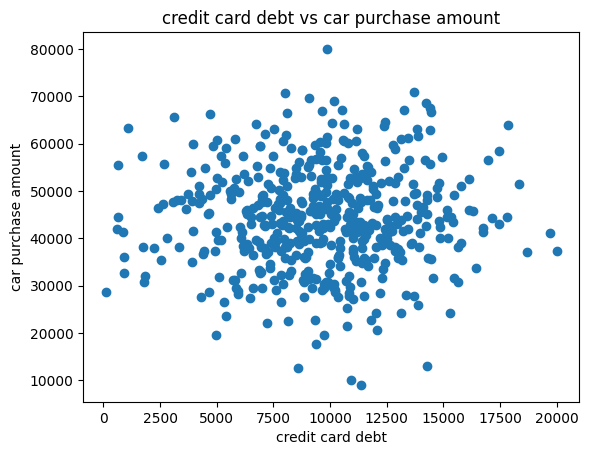

In [80]:
# credit card debt vs car purchase
plt.scatter(y='car purchase amount',x='credit card debt',data=df)
plt.xlabel('credit card debt')
plt.ylabel('car purchase amount')
plt.title('credit card debt vs car purchase amount');

In [81]:
#value counts of each group(male and female)
df['gender'].value_counts()

gender
1    253
0    247
Name: count, dtype: int64

In [82]:
df.groupby(['gender'])['car purchase amount'].mean()

gender
0    44933.131928
1    43503.620644
Name: car purchase amount, dtype: float64

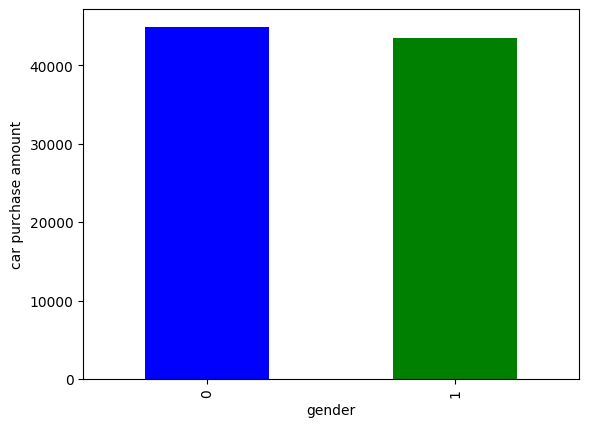

In [83]:
ax=df.groupby(['gender'])['car purchase amount'].mean().plot(kind='bar',xlabel='gender',
                                                          ylabel='car purchase amount',
                                                         color = ['blue','green'])

In [84]:
# droping columns
df.drop(columns=['customer name','customer e-mail','country'],inplace=True)
df.head(1)

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.85172,62812.09301,11609.38091,238961.2505,35321.45877


In [85]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# # Reshape the 'credit card debt' column to a 2D array-like format
# debt_column = df['credit card debt'].values.reshape(-1, 1)
# df[['annual Salary','net worth']]=scaler.fit_transform(df[['annual Salary','net worth']])
# df.head(1)


## Split

In [86]:
target= 'car purchase amount'
X=df.drop(target,axis=1)
y=df[target]
print(X.head(1))
print(y[0])

   gender       age  annual Salary  credit card debt    net worth
0       0  41.85172    62812.09301       11609.38091  238961.2505
35321.45877


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_test))
print(len(y_train))

400
100
100
400


## model

In [90]:
from sklearn.linear_model import LinearRegression, Lasso
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred=model.predict(X_test)

## Evaluate

In [92]:
#mean absolute error of train dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_mae=mean_absolute_error(y_train,model.predict(X_train))
train_mae

1.176518760776471

In [93]:
# mean absolute error , mean squared error of test dataset
test_mae=mean_absolute_error(y_test,y_pred)
test_mse=mean_squared_error(y_test,y_pred)
print(test_mae)
print(test_mse)

1.1535708940280165
2.0943696031557573


## Results

In [94]:
intercept=model.intercept_.round(2)
coefficient=model.coef_.round(2)
features=model.feature_names_in_
print(f'Biase:{intercept}')
print(f'coeficients:{coefficient}')
print(features)

Biase:-42147.07
coeficients:[-1.2000e-01  8.4156e+02  5.6000e-01 -0.0000e+00  3.0000e-02]
['gender' 'age' 'annual Salary' 'credit card debt' 'net worth']


In [96]:
# making data frame of test preditions as y_test
df_pred_test=pd.DataFrame({'y_test':y_test.round(2),
                          'y_pred':y_pred.round(2)})
df_pred_test.head(5)

,y_test,y_pred
361,46082.81,46084.58
73,45058.90,45060.42
374,63079.84,63081.57
155,31837.23,31838.29
104,60461.24,60460.97
